### Method 1: Random Forest Classifier
- using RF model to classify cities into low, medium, and high happiness levels based on available variables

In [1]:
import pandas as pd
from sklearn.model_selection import (cross_val_score, StratifiedKFold, cross_validate, train_test_split)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve)
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('cleaned_healthy_cities.csv')
print(data.columns.tolist())

['City', 'Rank', 'Sunshine hours(City)', 'Cost of a bottle of water(City)', 'Obesity levels(Country)', 'Life expectancy(years) (Country)', 'Pollution(Index score) (City)', 'Annual avg. hours worked', 'Outdoor activities(City)', 'Number of take out places(City)', 'Cost of a monthly gym membership(City)', 'happiness_level', 'happiness_level_labeled']


In [2]:
# Scaling
from sklearn.preprocessing import StandardScaler

X = data.drop(['happiness_level', 'happiness_level_labeled', 'Rank', 'City'], axis=1)
y = data['happiness_level_labeled']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
results = {}

In [3]:
# Training a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)
# Use the model to make predictions
rf_pred = rf_model.predict(X_test)
# Evaluation metrics rf
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
# Cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')

# Printing results
print(f"Test Accuracy: {rf_accuracy:.4f}")
print(f"Cross-validation Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# Storing metrics for future comparison
results['Random Forest'] = {
    'accuracy': rf_accuracy,
    'precision': rf_precision,
    'recall': rf_recall,
    'f1_score': rf_f1,
    'cv_mean': rf_cv_scores.mean(),
    'cv_std': rf_cv_scores.std()
}

Test Accuracy: 0.9286
Cross-validation Accuracy: 0.7667 (+/- 0.2667)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.67      1.00      0.80         2
           2       1.00      0.75      0.86         4

    accuracy                           0.93        14
   macro avg       0.89      0.92      0.89        14
weighted avg       0.95      0.93      0.93        14



**Variable Importance Plot** - RF

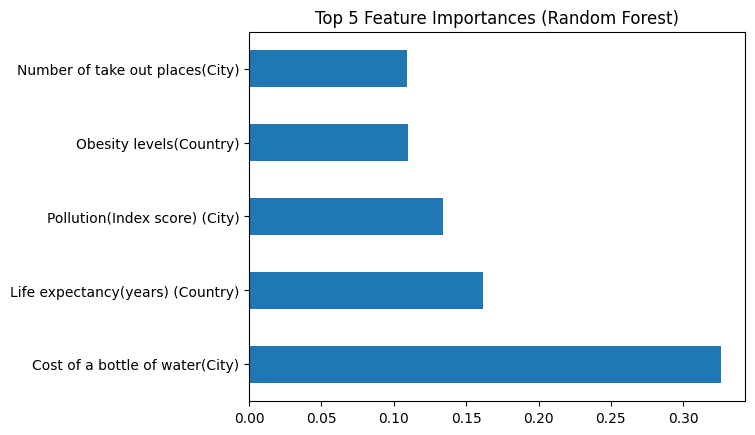

In [4]:
# RF Variable Importance Plot

rf_importances = pd.Series(rf_model.feature_importances_, index=data.drop(['happiness_level', 'happiness_level_labeled', 'Rank', 'City'], axis=1).columns)
rf_importances.nlargest(5).plot(kind='barh')
plt.title("Top 5 Feature Importances (Random Forest)")
plt.show()

### Method 2: Logistic Regression

In [5]:
# Training the logistic regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
# Evaluation metrics
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_pred, average='weighted')
# Cross-validation
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Test Accuracy: {lr_accuracy:.4f}")
print(f"Cross-validation Accuracy: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std() * 2:.4f})")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

# Storing the metrics for later comparisons
results['Logistic Regression'] = {
    'accuracy': lr_accuracy,
    'precision': lr_precision,
    'recall': lr_recall,
    'f1_score': lr_f1,
    'cv_mean': lr_cv_scores.mean(),
    'cv_std': lr_cv_scores.std()
}

Test Accuracy: 0.9286
Cross-validation Accuracy: 0.6000 (+/- 0.2667)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      1.00      1.00         2
           2       1.00      0.75      0.86         4

    accuracy                           0.93        14
   macro avg       0.96      0.92      0.93        14
weighted avg       0.94      0.93      0.93        14



### Method 3: SVM Classifier

In [6]:
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
# Evaluation metrics
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
# cv
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Test Accuracy: {svm_accuracy:.4f}")
print(f"Cross-validation Accuracy: {svm_cv_scores.mean():.4f} (+/- {svm_cv_scores.std() * 2:.4f})")
print("\nClassification Report:")
print(classification_report(y_test, svm_pred))
# storing the metrics
results['Support Vector Machine'] = {
    'accuracy': svm_accuracy,
    'precision': svm_precision,
    'recall': svm_recall,
    'f1_score': svm_f1,
    'cv_mean': svm_cv_scores.mean(),
    'cv_std': svm_cv_scores.std()
}

Test Accuracy: 1.0000
Cross-validation Accuracy: 0.5667 (+/- 0.1633)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



### Method 4: KNN Classifier

In [7]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
# Evaluation metrics
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')
# cv
knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Test Accuracy: {knn_accuracy:.4f}")
print(f"Cross-validation Accuracy: {knn_cv_scores.mean():.4f} (+/- {knn_cv_scores.std() * 2:.4f})")
print("\nClassification Report:")
print(classification_report(y_test, knn_pred))
# storing metrics for later
results['K-Nearest Neighbors'] = {
    'accuracy': knn_accuracy,
    'precision': knn_precision,
    'recall': knn_recall,
    'f1_score': knn_f1,
    'cv_mean': knn_cv_scores.mean(),
    'cv_std': knn_cv_scores.std()
}

Test Accuracy: 0.7143
Cross-validation Accuracy: 0.6333 (+/- 0.2494)

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       0.50      0.50      0.50         2
           2       1.00      0.25      0.40         4

    accuracy                           0.71        14
   macro avg       0.74      0.58      0.58        14
weighted avg       0.77      0.71      0.67        14



### Method 5: Gradient boosting classifier

In [8]:
gb_model = GradientBoostingClassifier(random_state=42, max_depth=3, n_estimators=100)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
# Evaluation metrics
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
# CV
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Test Accuracy: {gb_accuracy:.4f}")
print(f"Cross-validation Accuracy: {gb_cv_scores.mean():.4f} (+/- {gb_cv_scores.std() * 2:.4f})")
print("\nClassification Report:")
print(classification_report(y_test, gb_pred))
# storing results
results['Gradient Boosting'] = {
    'accuracy': gb_accuracy,
    'precision': gb_precision,
    'recall': gb_recall,
    'f1_score': gb_f1,
    'cv_mean': gb_cv_scores.mean(),
    'cv_std': gb_cv_scores.std()
}

Test Accuracy: 0.9286
Cross-validation Accuracy: 0.6333 (+/- 0.3266)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      1.00      1.00         2
           2       0.80      1.00      0.89         4

    accuracy                           0.93        14
   macro avg       0.93      0.96      0.94        14
weighted avg       0.94      0.93      0.93        14



### Comparison of Methods

In [10]:
# creating a df table to compare the results
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df.round(4)
comparison_df = comparison_df.sort_values('cv_mean', ascending=False)
print(comparison_df)
print(comparison_df.to_markdown(index=False))

                        accuracy  precision  recall  f1_score  cv_mean  cv_std
Random Forest             0.9286     0.9524  0.9286    0.9306   0.7667  0.1333
Gradient Boosting         0.9286     0.9429  0.9286    0.9302   0.6333  0.1633
K-Nearest Neighbors       0.7143     0.7727  0.7143    0.6669   0.6333  0.1247
Logistic Regression       0.9286     0.9365  0.9286    0.9256   0.6000  0.1333
Support Vector Machine    1.0000     1.0000  1.0000    1.0000   0.5667  0.0816
|   accuracy |   precision |   recall |   f1_score |   cv_mean |   cv_std |
|-----------:|------------:|---------:|-----------:|----------:|---------:|
|     0.9286 |      0.9524 |   0.9286 |     0.9306 |    0.7667 |   0.1333 |
|     0.9286 |      0.9429 |   0.9286 |     0.9302 |    0.6333 |   0.1633 |
|     0.7143 |      0.7727 |   0.7143 |     0.6669 |    0.6333 |   0.1247 |
|     0.9286 |      0.9365 |   0.9286 |     0.9256 |    0.6    |   0.1333 |
|     1      |      1      |   1      |     1      |    0.5667 |   0.0

### Results Summary
- Overall: RF wins
- SVM overfitting and not the best choice for this dataset or sample size

In [10]:
# Saving to csv file
comparison_df.to_csv('model_comparison_results.csv')
print(f"\nResults saved to 'model_comparison_results.csv'")


Results saved to 'model_comparison_results.csv'


### Confusion matrix for RF (best model) performance

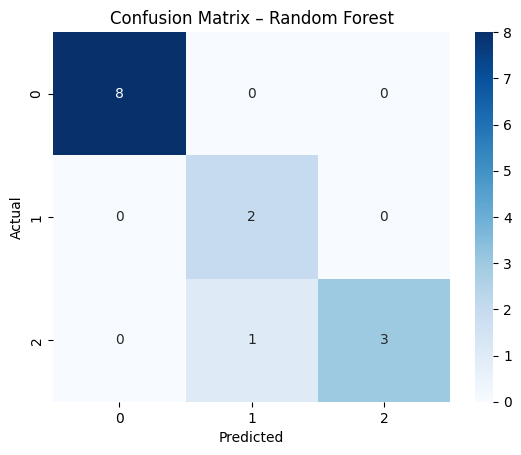

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_pred, labels=rf_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Random Forest')
plt.show()